In [2]:
import os
import glob
import numpy as np
import xarray as xr
from scipy.ndimage import rotate

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import time
import cartopy.crs as ccrs
import cartopy


In [13]:
orogm=xr.open_dataarray("../../data/ERA5orography.nc").isel(time=0)/9.81
lsm=xr.open_dataarray("../../data/ERA5lsm.nc").isel(time=0)

In [18]:
trmmpr=xr.open_dataarray("../../data/TRMM.mnth.pr.20100101-20191231.nc")
trmmpr.coords['longitude'] = trmmpr.coords['longitude'] % 360
trmmpr = trmmpr.sortby(trmmpr.longitude)

In [29]:
trmmpr

<xarray.DataArray 'rr' (time: 120, latitude: 400, longitude: 1440)>
[69120000 values with dtype=float32]
Coordinates:
  * time       (time) object 2010-01-01 00:00:00 ... 2019-12-01 00:00:00
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
  * longitude  (longitude) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    direction:      IJL
    ioos_category:  Meteorology
    long_name:      3b43 hourly rainfall [mm/hour]

In [97]:
#mountains=[([106,110,10,18],"Annamite range (Vietnam)",60),
#           ([73,78,9,17],"Western Ghats",70),
#           ([360-79,360-68,-17,-9],"Central Andes",45),
#           ([80,90,25,35],"Himalaya",10),
#           ([95,106,-6,6],"Bukit Barisan (Sumatra)",45),
#           ([135,150,-11,-1],"New Guinea highlands",10)
#          ]

mountains=[([102,113,10,18],"Annamite range (Vietnam)",60+180,11),
           ([70,80,9,17],"Western Ghats",70,7),
           ([360-82,360-68,-17,-9],"Central Andes",45+180,2),
           ([80,90,25,35],"Himalaya",10,7),
           ([95,106,-6,6],"Bukit Barisan (Sumatra)",45,11),
           ([135,150,-11,-1],"New Guinea highlands",10,3)
          ]

In [98]:
prdata=[]
for i,(lonlat,name,_,mnth) in enumerate(mountains):
    window=trmmpr.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[2],lonlat[3])).groupby("time.month").mean("time").sel(month=mnth)
    prdata.append(np.array(window)[::-1,:])
    

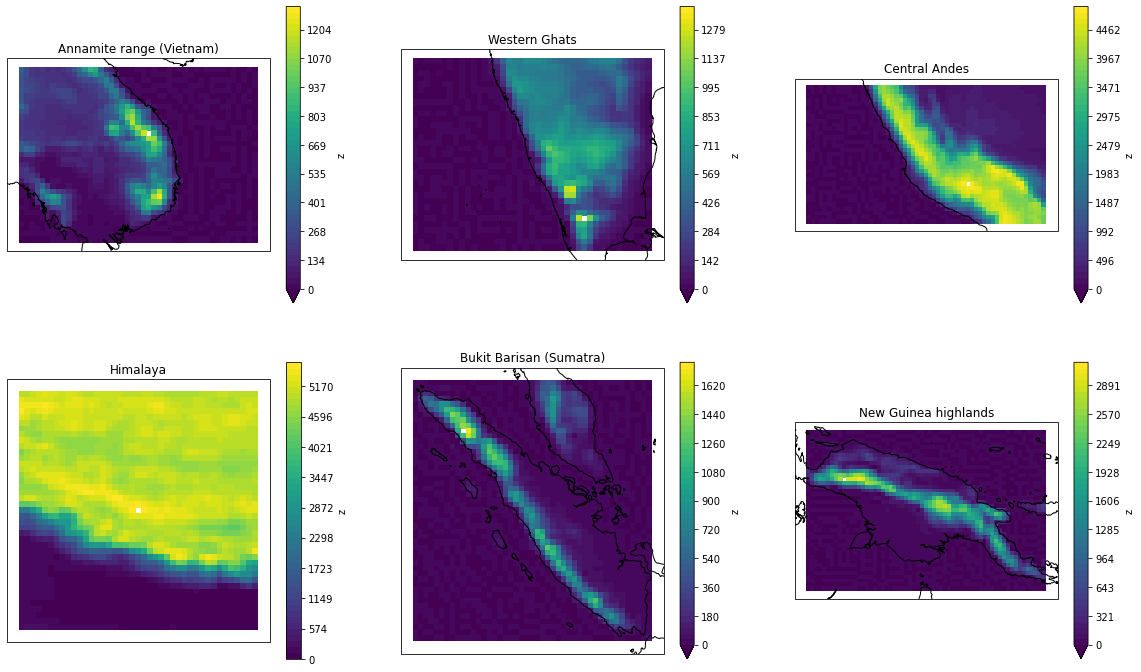

In [99]:
mountaindata = []
_,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,_,_) in enumerate(mountains):
    ax[i].coastlines()
    window=orogm.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[3],lonlat[2]))
    mountaindata.append(np.array(window))
    window.plot(ax=ax[i],transform=ccrs.PlateCarree(),cmap=plt.cm.viridis,levels=np.linspace(0,window.max()))
    ax[i].set_title(name)


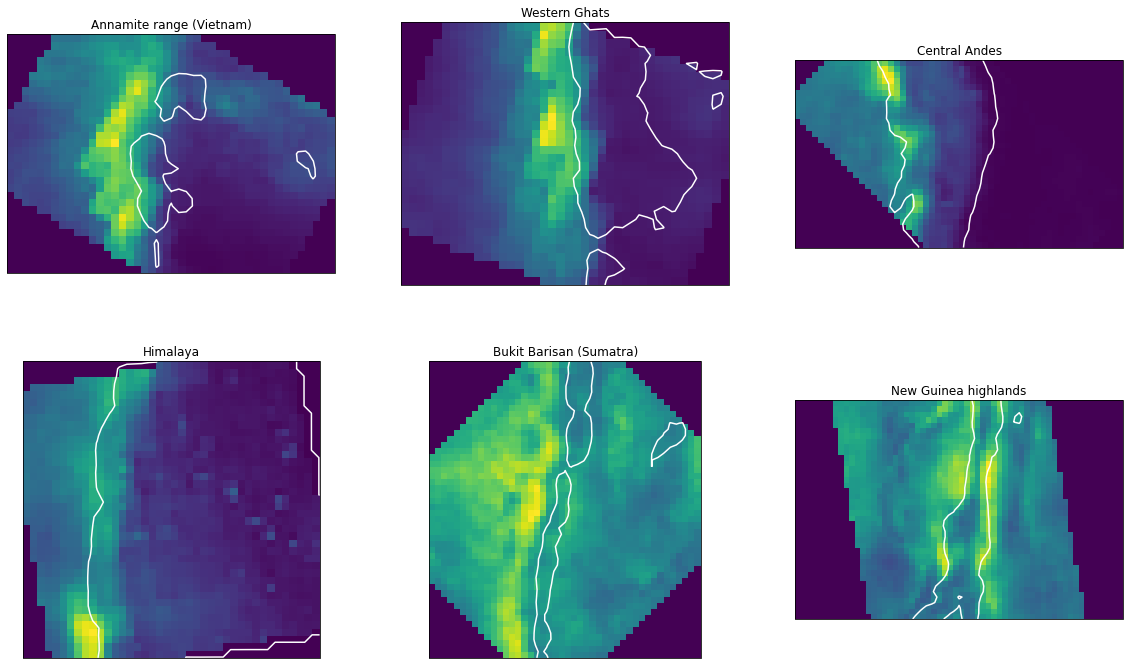

In [100]:
_,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    orogwindow = mountaindata[i]
    window = prdata[i]
    ax[i].set_title(name)
    #ax[i].pcolormesh(window[::-1],cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))

    ax[i].pcolormesh(rotate(window[::-1],90-angle,reshape=False),cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))
    ax[i].contour(rotate(orogwindow[::-1],90-angle,reshape=False),**{'levels':[500],'colors':['w']})


/Users/quentin.nicolas/miniconda3/envs/atmos/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


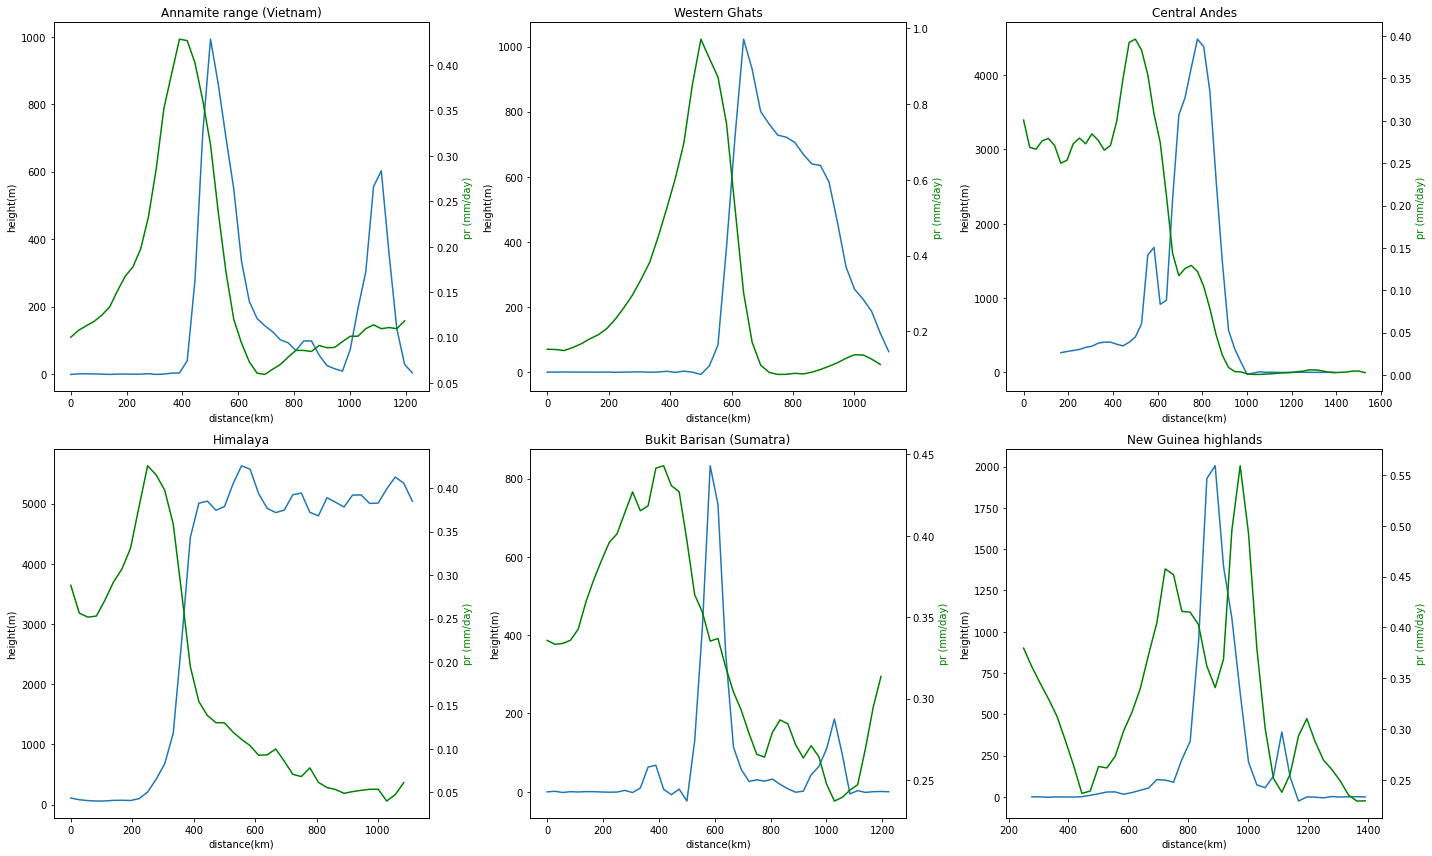

In [101]:
km_per_degreelat = 6370*np.pi/180
fig,ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    
    window = mountaindata[i]
    ax[i].set_title(name)
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax[i].plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:])
    ax[i].set_xlabel("distance(km)")
    ax[i].set_ylabel("height(m)")

    window = prdata[i]
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax2=ax[i].twinx()
    ax2.set_ylabel('pr (mm/day)', color='g') #ax2.set_ylim(0,30);
    #ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:],'k')
    ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],np.nanmean(window_rot[n//4:3*n//4,:],axis=0),'g')

fig.tight_layout()

/Users/quentin.nicolas/miniconda3/envs/atmos/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


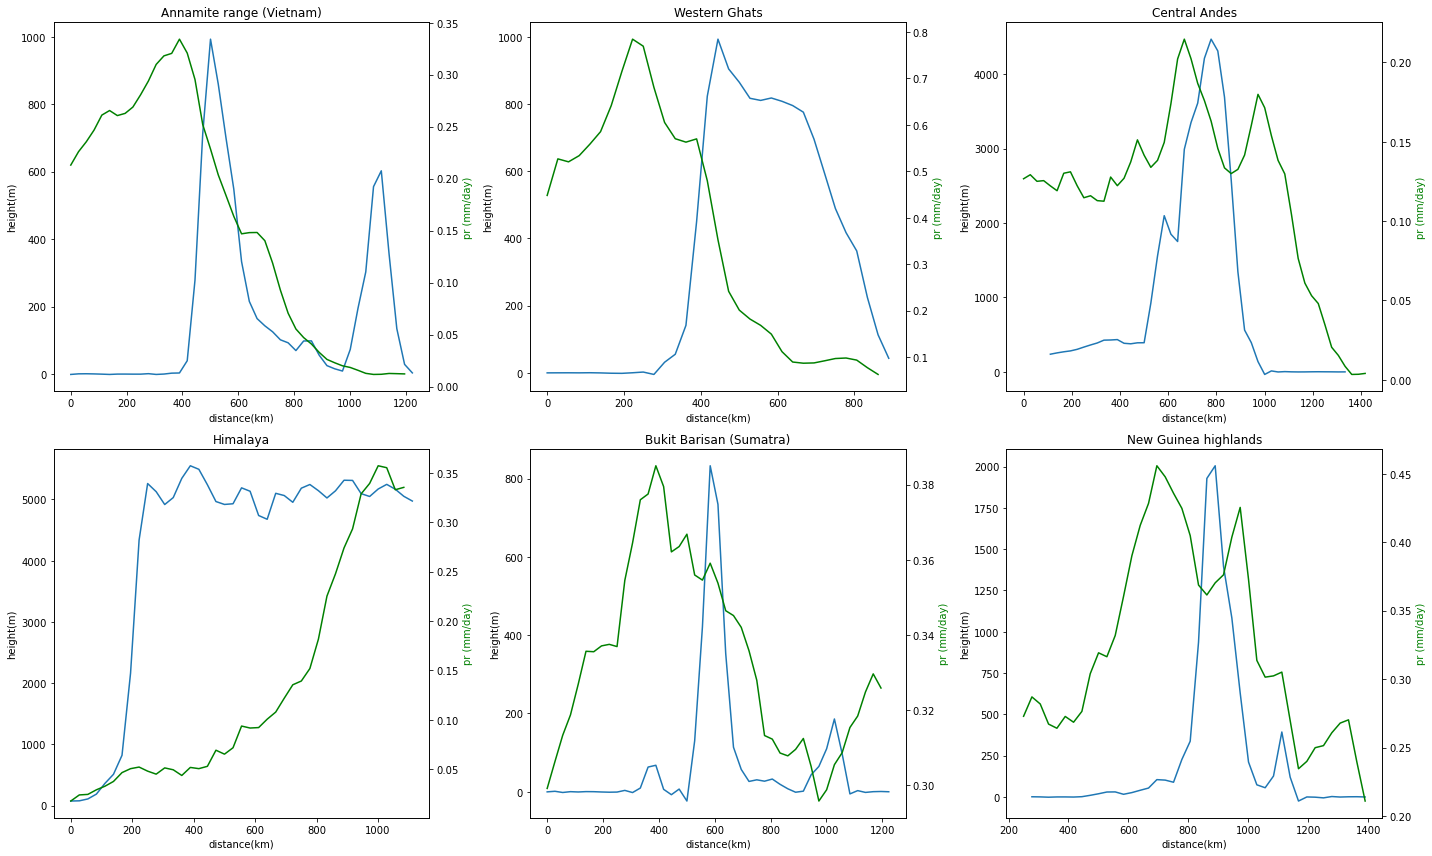

In [79]:
km_per_degreelat = 6370*np.pi/180
fig,ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.reshape(-1)
for i,(lonlat,name,angle,_) in enumerate(mountains):
    
    window = mountaindata[i]
    ax[i].set_title(name)
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax[i].plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:])
    ax[i].set_xlabel("distance(km)")
    ax[i].set_ylabel("height(m)")

    window = prdata[i]
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax2=ax[i].twinx()
    ax2.set_ylabel('pr (mm/day)', color='g') #ax2.set_ylim(0,30);
    #ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:],'k')
    ax2.plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],np.nanmean(window_rot[n//4:3*n//4,:],axis=0),'g')

fig.tight_layout()